In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [120]:
wine = pd.read_csv('winequality-red.csv', sep=';')

In [121]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [123]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [124]:
# Preprocessing

bins = (2, 6.5, 8) # 2 categories across quality.  Spread of 6.5.  Index of 8 (0-8 across ratings)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)

In [125]:
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [126]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [127]:
# Transforming categorical variables into numeric (integer)

label_quality = LabelEncoder()

In [128]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [129]:
wine['quality'][:30]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: quality, dtype: int64

In [130]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [131]:
wine.mean(), wine.std()

(fixed acidity            8.319637
 volatile acidity         0.527821
 citric acid              0.270976
 residual sugar           2.538806
 chlorides                0.087467
 free sulfur dioxide     15.874922
 total sulfur dioxide    46.467792
 density                  0.996747
 pH                       3.311113
 sulphates                0.658149
 alcohol                 10.422983
 quality                  0.135710
 dtype: float64,
 fixed acidity            1.741096
 volatile acidity         0.179060
 citric acid              0.194801
 residual sugar           1.409928
 chlorides                0.047065
 free sulfur dioxide     10.460157
 total sulfur dioxide    32.895324
 density                  0.001887
 pH                       0.154386
 sulphates                0.169507
 alcohol                  1.065668
 quality                  0.342587
 dtype: float64)

In [132]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

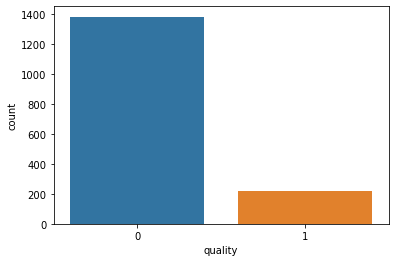

In [133]:
sns.countplot(wine['quality'])

In [134]:
# Separation of response and feature variables

X = wine.drop('quality', axis=1)
y = wine['quality']

In [135]:
# train and test splitting
# random state is the seed.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# scale asymmetric data

sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Fit and transform 
X_test = sc.transform(X_test) # do not refit the data. Apply the previous fit to the 'new' data

In [137]:
scipy.stats.describe(X_train).mean, scipy.stats.describe(X_train).variance

(array([-1.11109106e-16,  4.11798126e-16,  1.26386609e-16,  1.52775021e-17,
        -1.04164787e-16, -7.63875107e-17, -7.56930788e-17,  2.55939827e-14,
        -1.35830883e-15,  4.15270285e-16,  4.77769158e-16]),
 array([1.00078247, 1.00078247, 1.00078247, 1.00078247, 1.00078247,
        1.00078247, 1.00078247, 1.00078247, 1.00078247, 1.00078247,
        1.00078247]))

In [138]:
scipy.stats.describe(X_test).mean,scipy.stats.describe(X_test).variance 

(array([-0.01175055, -0.07635958, -0.03823836, -0.05802946, -0.09945134,
        -0.00055896, -0.02873498, -0.0735317 , -0.01741397, -0.05366908,
         0.02318761]),
 array([1.10229113, 0.9871936 , 0.96962763, 0.82224322, 0.54578829,
        1.14749435, 0.98907205, 1.17061238, 1.02784431, 0.71315004,
        1.12781729]))

<AxesSubplot:ylabel='Count'>

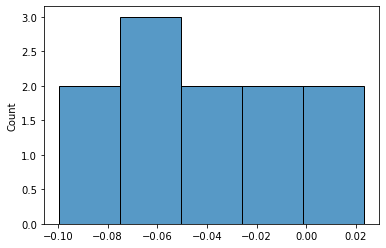

In [139]:
sns.histplot(scipy.stats.describe(X_test).mean)

<AxesSubplot:ylabel='Count'>

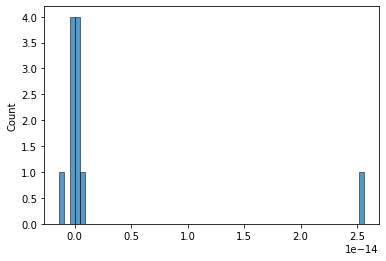

In [140]:
sns.histplot(scipy.stats.describe(X_train).mean)

In [141]:
# Random Forest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [142]:
pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [143]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.76      0.55      0.64        47

    accuracy                           0.91       320
   macro avg       0.85      0.76      0.80       320
weighted avg       0.90      0.91      0.90       320



In [144]:
# Support Vector Machine

clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [145]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [146]:
# Neural Network

mlpc = MLPClassifier(hidden_layer_sizes=(11,100,100,100), max_iter=5000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [147]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.67      0.60      0.63        47

    accuracy                           0.90       320
   macro avg       0.80      0.77      0.78       320
weighted avg       0.89      0.90      0.89       320

[[259  14]
 [ 19  28]]
